In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Predict Diabetes/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Source = https://www.kaggle.com/datasets/whenamancodes/predict-diabities

In [3]:
from sklearn.model_selection import train_test_split

X = np.array(df.loc[:,'Pregnancies':'Age'])
y = np.array(df['Outcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=406)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [4]:
C_range = np.logspace(0, 10, 11)
gamma_range = np.logspace(-14, -4, 11)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svm_list = []

# # RBF Kernel
# for C in C_range:
#     for gamma in gamma_range:
#         svm_rbf = SVC(kernel='rbf', C=C, gamma=gamma)
#         svm_fit = svm_rbf.fit(X_train, y_train)
#         svm_list.append(svm_fit)

#         print('C = ' + str(C) + ' , ' + 'gamma = ' + str(gamma))


C_range = np.logspace(5, 15, 11)  
gamma_range = np.logspace(-14, -4, 11)

1__1e5._____1__1e-14  
2__1e6._____2__1e-13  
3__1e7._____3__1e-12  
4__1e8._____4__1e-11  
5__1e9._____5__1e-10  
6__1e10____6__1e-9  
7__1e11____7__1e-8  
8__1e12____8__1e-7  
9__1e13____9__1e-6  
10_1e14____10_1e-5  
11_1e15____11_0.0001

In [6]:
import pickle

# # save train-test data
# svm_save = open('svm_train.csv', 'wb')
# pickle.dump(svm_list, svm_save)
# svm_save.close()


In [7]:
# load data
svm_read = open('svm_train.csv', 'rb')
svm_list_load = pickle.load(svm_read)
svm_list_load


[SVC(gamma=1e-14),
 SVC(gamma=1e-13),
 SVC(gamma=1e-12),
 SVC(gamma=1e-11),
 SVC(gamma=1e-10),
 SVC(gamma=1e-09),
 SVC(gamma=1e-08),
 SVC(gamma=1e-07),
 SVC(gamma=1e-06),
 SVC(gamma=1e-05),
 SVC(gamma=0.0001),
 SVC(C=10.0, gamma=1e-14),
 SVC(C=10.0, gamma=1e-13),
 SVC(C=10.0, gamma=1e-12),
 SVC(C=10.0, gamma=1e-11),
 SVC(C=10.0, gamma=1e-10),
 SVC(C=10.0, gamma=1e-09),
 SVC(C=10.0, gamma=1e-08),
 SVC(C=10.0, gamma=1e-07),
 SVC(C=10.0, gamma=1e-06),
 SVC(C=10.0, gamma=1e-05),
 SVC(C=10.0, gamma=0.0001),
 SVC(C=100.0, gamma=1e-14),
 SVC(C=100.0, gamma=1e-13),
 SVC(C=100.0, gamma=1e-12),
 SVC(C=100.0, gamma=1e-11),
 SVC(C=100.0, gamma=1e-10),
 SVC(C=100.0, gamma=1e-09),
 SVC(C=100.0, gamma=1e-08),
 SVC(C=100.0, gamma=1e-07),
 SVC(C=100.0, gamma=1e-06),
 SVC(C=100.0, gamma=1e-05),
 SVC(C=100.0, gamma=0.0001),
 SVC(C=1000.0, gamma=1e-14),
 SVC(C=1000.0, gamma=1e-13),
 SVC(C=1000.0, gamma=1e-12),
 SVC(C=1000.0, gamma=1e-11),
 SVC(C=1000.0, gamma=1e-10),
 SVC(C=1000.0, gamma=1e-09),
 SVC(C=10

In [8]:
test_max = -1
idx = -1
test_list = []

for n in range(0, (len(C_range)*len(gamma_range))):
    test = svm_list_load[n].score(X_test, y_test)
    test_list.append(test)

    if test_max < test:
        idx = n
        test_max = test

print('idx = ' + str(idx))
print(svm_list_load[idx])
print('test_max = ' + str(test_max))

idx = 116
SVC(C=10000000000.0, gamma=1e-08)
test_max = 0.8229166666666666


In [9]:
svm = svm_list_load[idx]
svm

SVC(C=10000000000.0, gamma=1e-08)

In [10]:
test_grid = np.array(test_list).reshape(len(C_range), len(gamma_range))

In [11]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


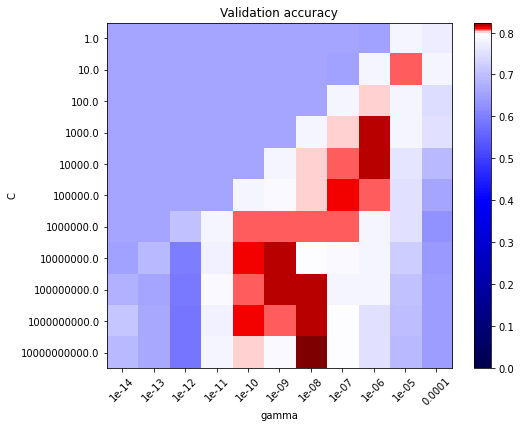

In [12]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    test_grid,
    interpolation="nearest",
    cmap=plt.cm.seismic,
    norm=MidpointNormalize(vmin=0, midpoint=0.8),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()


In [13]:
# train_ = svm.score(X_train, y_train)
# test_ = svm.score(X_test, y_test)

# y_pred_ = svm.predict(X_test)

# y_score_ = svm.decision_function(X_test)

# svm_var = [train_, test_, y_pred_, y_score_]

In [14]:
# svm_save_var = open('svm_var.csv', 'wb')
# pickle.dump(svm_var, svm_save_var)
# svm_save_var.close()

In [15]:
svm_read_var = open('svm_var.csv', 'rb')
svm_result = pickle.load(svm_read_var)

In [16]:
# 0, 1, 2, 3
train = svm_result[0]
test = svm_result[1]
y_pred = svm_result[2]
y_score = svm_result[3]

In [17]:
print("Train set accuracy = " + str(train))
print("Test set accuracy = " + str(test))
print("y_pred = " + str(y_pred))
print("y_score = " + str(y_score))

Train set accuracy = 0.7621527777777778
Test set accuracy = 0.8229166666666666
y_pred = [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1
 1 0 0 0 0 0 0]
y_score = [  5164.02846611   -134.99879944  -1785.55756866  -3479.18080436
  -2561.8499633   -1438.63778412  -2058.5530616   -1805.79199707
  -2176.16665756   1141.02540863  -3435.08207237  -8853.36898529
  -2532.6736747   -1822.6787101   -1362.49811661  -1859.98658668
  -1832.86028587  -1132.6996566   -2370.56970131  -2781.15755951
  -7161.1082946    -720.45082962  -2564.85093986  -1856.02939331
  -1928.24247276  -4119.23031532  -2101.58321106  -2845.07644188
    -12.16564094  -4963.77977669  -3210.56499397   -499.

In [18]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(115, 11, 23, 43)

In [19]:
plt.rcParams.update({'font.size': 14})

0 = not diabetic  
1 = diabetic  

negative = not diabetic  
positive = diabetic  

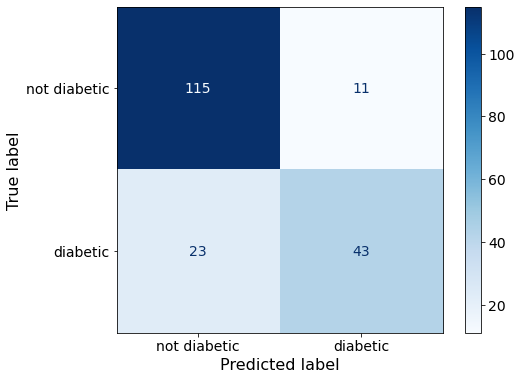

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

label_name = 'not diabetic', 'diabetic'

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', display_labels=label_name, ax=ax)

ax.set_xlabel('Predicted label', fontdict={'size': '16'})
ax.set_ylabel('True label', fontdict={'size': '16'})
ax.tick_params(axis='both', labelsize=14)

plt.show()


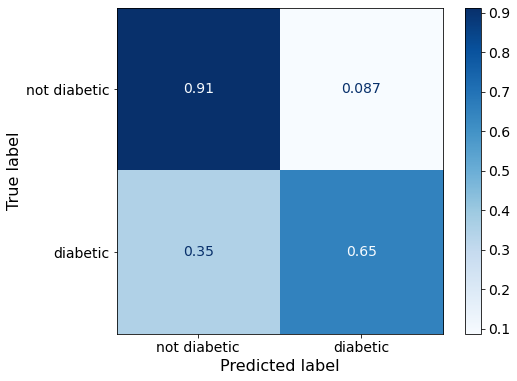

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='Blues', normalize='true', display_labels=label_name, ax=ax)

ax.set_xlabel('Predicted label', fontdict={'size': '16'})
ax.set_ylabel('True label', fontdict={'size': '16'})
ax.tick_params(axis='both', labelsize=14)

plt.show()


1 = diabetic  
0 = not diabetic

In [22]:
X_test_tn = []
X_test_tp = []
X_test_fn = []
X_test_fp = []

for i in np.arange(0, len(y_test), 1):
    if y_test[i] == y_pred[i] == 0:
        # 0 = not diabetic = n
        X_test_tn += [X_test[i]]

    elif y_test[i] == y_pred[i] == 1:
        # 1 = diabetic = p
        X_test_tp += [X_test[i]]
        
    elif y_test[i] > y_pred[i]:
        # 1 > 0 = diabetic but pred not diabetic
        X_test_fn += [X_test[i]]
        
    elif y_test[i] < y_pred[i]:
        # 0 < 1 = not diabetic but pred diabetic
        X_test_fp += [X_test[i]]


In [23]:
# X = [(a1, b1, c1, d1, e1), (a2, b2, c2, d2, e2), (a3, b3, c3, d3, e3),...]
# *X = (a1, b1, c1, d1, e1) (a2, b2, c2, d2, e2) (a3, b3, c3, d3, e3)...
# zip(*X) = (a1, a2, a3,...), (b1, b2, b3,...), (c1, c2, c3,...), (d1, d2, d3,...), (e1, e2, e3,...) --> อ่านไม่ได้เลยต้องใส่ list

X_test_tn = list(zip(*X_test_tn))
X_test_tp = list(zip(*X_test_tp))
X_test_fn = list(zip(*X_test_fn))
X_test_fp = list(zip(*X_test_fp))

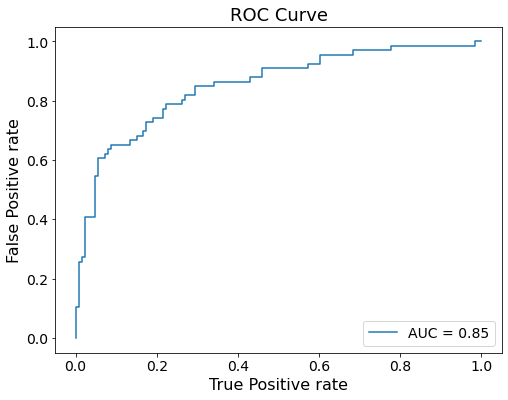

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

fig, ax = plt.subplots(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=svm.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax)

plt.rcParams.update({'font.size': 14})
plt.xlabel('True Positive rate', fontdict={'size':'16'})
plt.ylabel('False Positive rate', fontdict={'size':'16'})
plt.tick_params(axis='both', labelsize=14)
plt.title('ROC Curve', size=18)

plt.show()

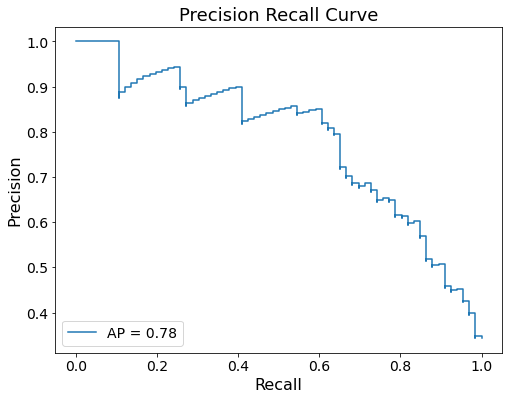

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score

fig, ax = plt.subplots(figsize=(8, 6))

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=svm.classes_[1])
ap = average_precision_score(y_test, y_score)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision=ap).plot(ax=ax)

plt.rcParams.update({'font.size': 14})
plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Recall', fontdict={'size':'16'})
plt.ylabel('Precision', fontdict={'size':'16'})
plt.title('Precision Recall Curve', size=18)

plt.show()

In [26]:
from sklearn.inspection import permutation_importance

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure',
                 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features = np.array(feature_names)


In [27]:
# perm_importance = permutation_importance(svm, X_test, y_test)

In [28]:
# save_imp = open('svm_perm_imp.csv', 'wb')
# pickle.dump(perm_importance, save_imp)
# save_imp.close()

In [29]:
read_imp = open('svm_perm_imp.csv', 'rb')
perm_imp = pickle.load(read_imp)
perm_imp

{'importances_mean': array([0.03020833, 0.17291667, 0.01875   , 0.01041667, 0.01041667,
        0.05208333, 0.00729167, 0.01041667]),
 'importances_std': array([0.01660143, 0.03217384, 0.01072461, 0.00570544, 0.00658808,
        0.02109214, 0.01072461, 0.00329404]),
 'importances': array([[ 0.02604167,  0.02604167,  0.0625    ,  0.02083333,  0.015625  ],
        [ 0.22395833,  0.16666667,  0.19270833,  0.14583333,  0.13541667],
        [ 0.02083333,  0.        ,  0.03125   ,  0.02604167,  0.015625  ],
        [ 0.00520833,  0.00520833,  0.02083333,  0.01041667,  0.01041667],
        [ 0.015625  ,  0.        ,  0.00520833,  0.015625  ,  0.015625  ],
        [ 0.0625    ,  0.05729167,  0.08333333,  0.03125   ,  0.02604167],
        [ 0.01041667,  0.02604167,  0.00520833, -0.00520833,  0.        ],
        [ 0.01041667,  0.01041667,  0.01041667,  0.015625  ,  0.00520833]])}

Text(0.5, 0, 'Importance Score')

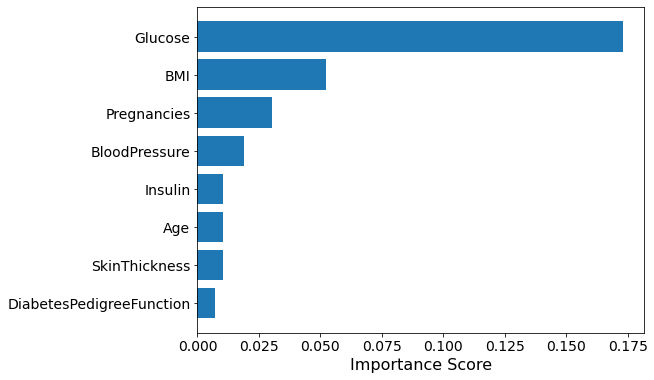

In [30]:
sorted_idx = perm_imp.importances_mean.argsort()

plt.figure(figsize=(8, 6), facecolor='none')

plt.barh(features[sorted_idx], perm_imp.importances_mean[sorted_idx])

plt.tick_params(axis='both', labelsize=14)
plt.xlabel('Importance Score', size=16)


In [70]:
def hist_target(xlim, xticks, step, x, x1, x2, x_name):
    plt.figure(figsize=(8, 6))
    # plt.gca(xlim=xlim, xticks=xticks)

    bins = np.arange(np.min(x), np.max(x) + step, step)
    
    plt.hist(x1, bins=bins, alpha=0.5, label='diabetic')
    plt.hist(x2, bins=bins, alpha=0.5, label='not diabetic')

    plt.xlabel(x_name, size=16)
    plt.ylabel('Number', size=16)
    plt.legend(loc='upper right')

    plt.tick_params(which='major', direction='in', length=5, labelsize='12')

In [115]:
def hist_target_ax(p1, p2, xlim, xticks, step, x, x1, x2, x_name):
    # ax[p1, p2].set_xlim(xlim)
    # ax[p1, p2].set_xticks(xticks)

    bins = np.arange(min(x), max(x)+step, step)

    ax[p1, p2].hist(x1, bins=bins, alpha=0.5, label='diabetic')
    ax[p1, p2].hist(x2, bins=bins, alpha=0.5, label='not diabetic')

    # ax[p1, p2].set_yscale('log')

    ax[p1, p2].set_xlabel(x_name, fontsize=16)
    ax[p1, p2].set_ylabel('Number', fontsize=16)
    ax[p1, p2].legend(loc='upper right')

    ax[p1, p2].tick_params(which='major', direction='in', length=5, labelsize='12')

1 = diabetic  
0 = not diabetic

In [137]:
# 'DiabetesPedigreeFunction', 'SkinThickness', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies', 'BMI', 'Glucose'

Outcome = df['Outcome']

Glucose = df['Glucose']
Glucose_yes = df['Glucose'].loc[df['Outcome']==1]
Glucose_no = df['Glucose'].loc[df['Outcome']==0]

BMI = df['BMI']
BMI_yes = df['BMI'].loc[df['Outcome']==1]
BMI_no = df['BMI'].loc[df['Outcome']==0]

Pregnancies = df['Pregnancies']
Pregnancies_yes = df['Pregnancies'].loc[df['Outcome']==1]
Pregnancies_no = df['Pregnancies'].loc[df['Outcome']==0]

BloodPressure = df['BloodPressure']
BloodPressure_yes = df['BloodPressure'].loc[df['Outcome']==1]
BloodPressure_no = df['BloodPressure'].loc[df['Outcome']==0]

Insulin = df['Insulin']
Insulin_yes = df['Insulin'].loc[df['Outcome']==1]
Insulin_no = df['Insulin'].loc[df['Outcome']==0]

Age = df['Age']
Age_yes = df['Age'].loc[df['Outcome']==1]
Age_no = df['Age'].loc[df['Outcome']==0]

SkinThickness = df['SkinThickness']
SkinThickness_yes = df['SkinThickness'].loc[df['Outcome']==1]
SkinThickness_no = df['SkinThickness'].loc[df['Outcome']==0]

DiabetesPedigreeFunction = df['DiabetesPedigreeFunction']
DiabetesPedigreeFunction_yes = df['DiabetesPedigreeFunction'].loc[df['Outcome']==1]
DiabetesPedigreeFunction_no = df['DiabetesPedigreeFunction'].loc[df['Outcome']==0]

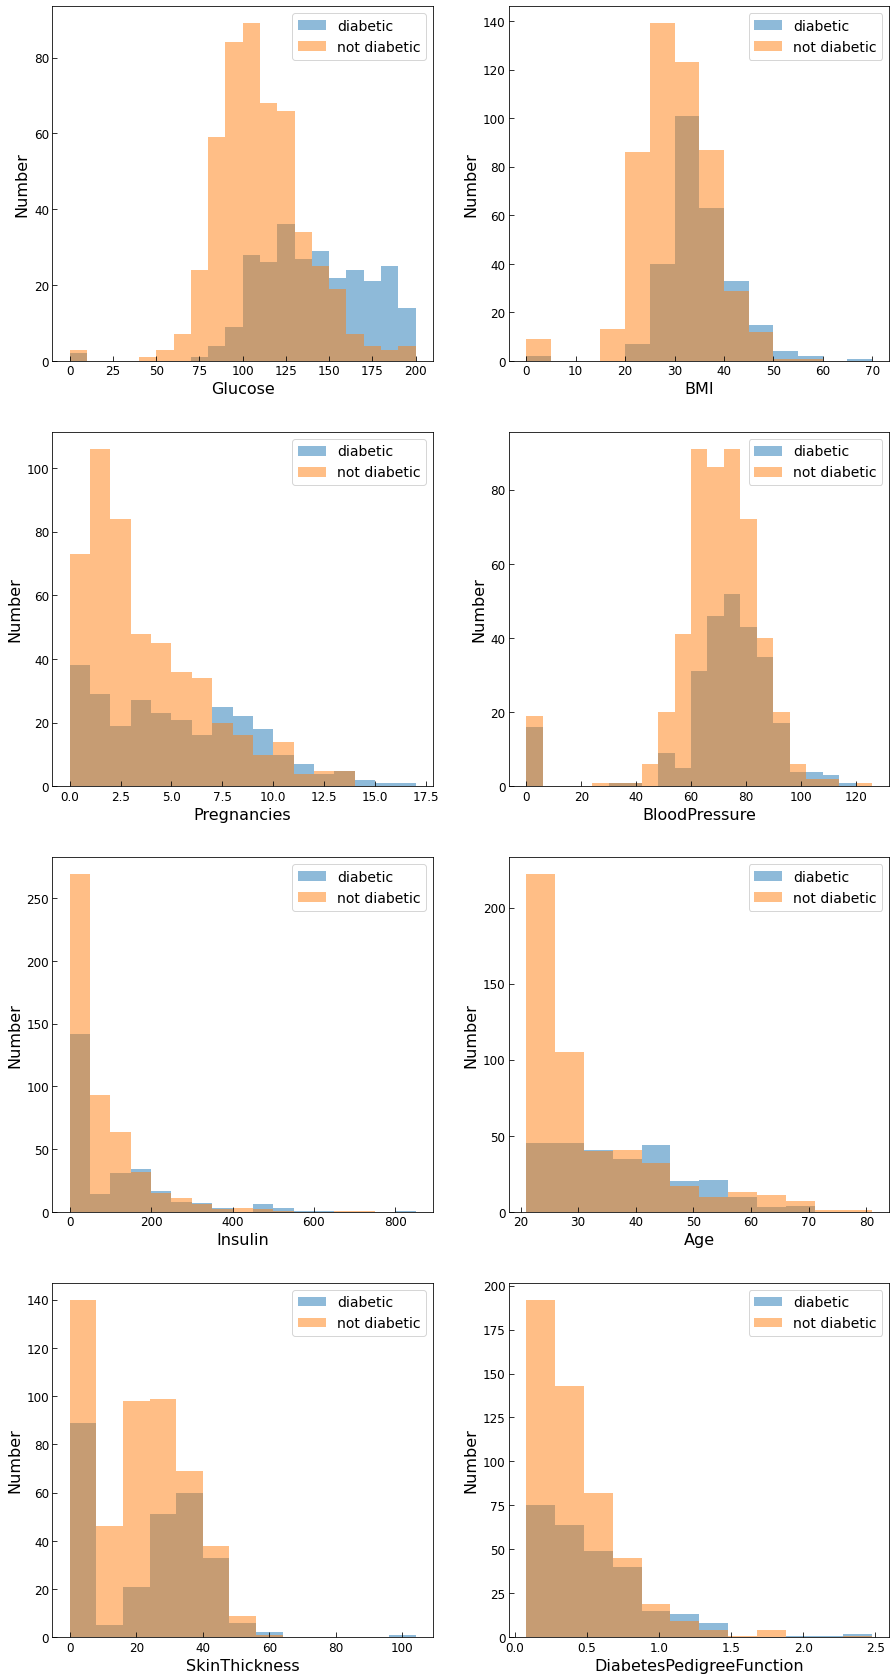

In [128]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 30))

# 'DiabetesPedigreeFunction', 'SkinThickness', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies', 'BMI', 'Glucose'

hist_target_ax(0, 0, 1, 1, 10, Glucose, Glucose_yes, Glucose_no, 'Glucose')
hist_target_ax(0, 1, 1, 1, 5, BMI, BMI_yes, BMI_no, 'BMI')
hist_target_ax(1, 0, 1, 1, 1, Pregnancies, Pregnancies_yes, Pregnancies_no, 'Pregnancies')
hist_target_ax(1, 1, 1, 1, 6, BloodPressure, BloodPressure_yes, BloodPressure_no, 'BloodPressure')
hist_target_ax(2, 0, 1, 1, 50, Insulin, Insulin_yes, Insulin_no, 'Insulin')
hist_target_ax(2, 1, 1, 1, 5, Age, Age_yes, Age_no, 'Age')
hist_target_ax(3, 0, 1, 1, 8, SkinThickness, SkinThickness_yes, SkinThickness_no, 'SkinThickness')
hist_target_ax(3, 1, 1, 1, 0.2, DiabetesPedigreeFunction, DiabetesPedigreeFunction_yes, DiabetesPedigreeFunction_no, 'DiabetesPedigreeFunction')

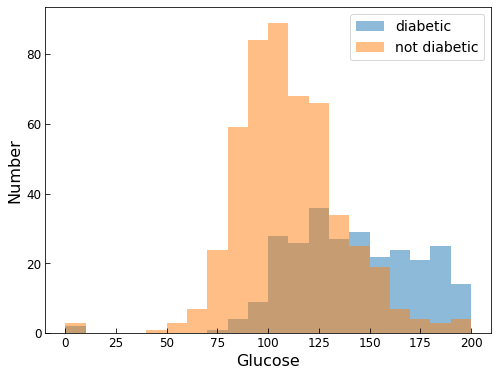

In [85]:
hist_target([0,10], np.arange(0,11,1), 10, Glucose, Glucose_yes, Glucose_no, 'Glucose')

In [ ]:
hist_target([0,10], np.arange(0,11,1), 10, Glucose, Glucose_yes, Glucose_no, 'Glucose')

In [77]:
def tn_tp_fn_fp(xlim, xticks, step, x, xlabel, pos):
    plt.figure(figsize=(8, 6), facecolor='none')
    # plt.gca(xlim=xlim, xticks = xticks)

    # step = 0.15
    bins = np.arange(np.min(x), np.max(x) + step, step)

    plt.hist(X_test_tp[pos], bins=bins, alpha=0.5, label='tp')
    plt.hist(X_test_tn[pos], bins=bins, alpha=0.5, label='tn')
    plt.hist(X_test_fp[pos], bins=bins, alpha=0.5, label='fp')
    plt.hist(X_test_fn[pos], bins=bins, alpha=0.5, label='fn')

    plt.xlabel(str(xlabel), size=16)
    plt.ylabel('Number', size=16)
    plt.legend(loc='upper right')

    plt.tick_params(which='major', direction='in', length=5, labelsize='12')

'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

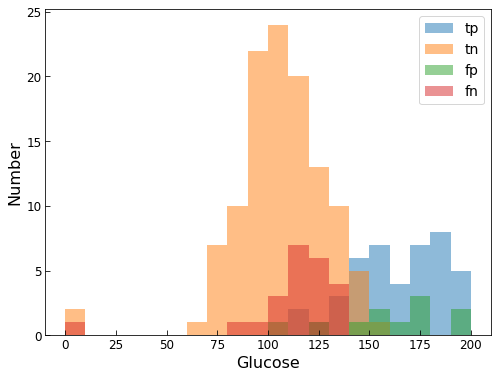

In [84]:
tn_tp_fn_fp([0,10], np.arange(0,11,1), 10, Glucose, 'Glucose', 1)

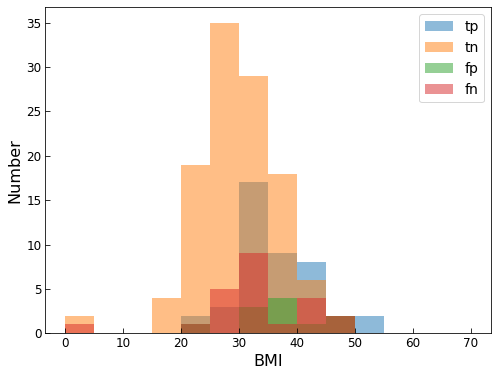

In [133]:
tn_tp_fn_fp([0,10], np.arange(0,11,1), 5, BMI, 'BMI', 5)

In [145]:
def scat_ax(p1, p2, x1, x2, x_name, y_name):

    ax[p1, p2].scatter(x1, x2, c=y, alpha=0.5)

    ax[p1, p2].set_xlabel(x_name, fontsize=16)
    ax[p1, p2].set_ylabel(y_name, fontsize=16)
    # ax[p1, p2].legend(['diabetic', 'not diabetic'], loc='upper right')

    ax[p1, p2].tick_params(which='major', direction='in', length=5, labelsize='12')

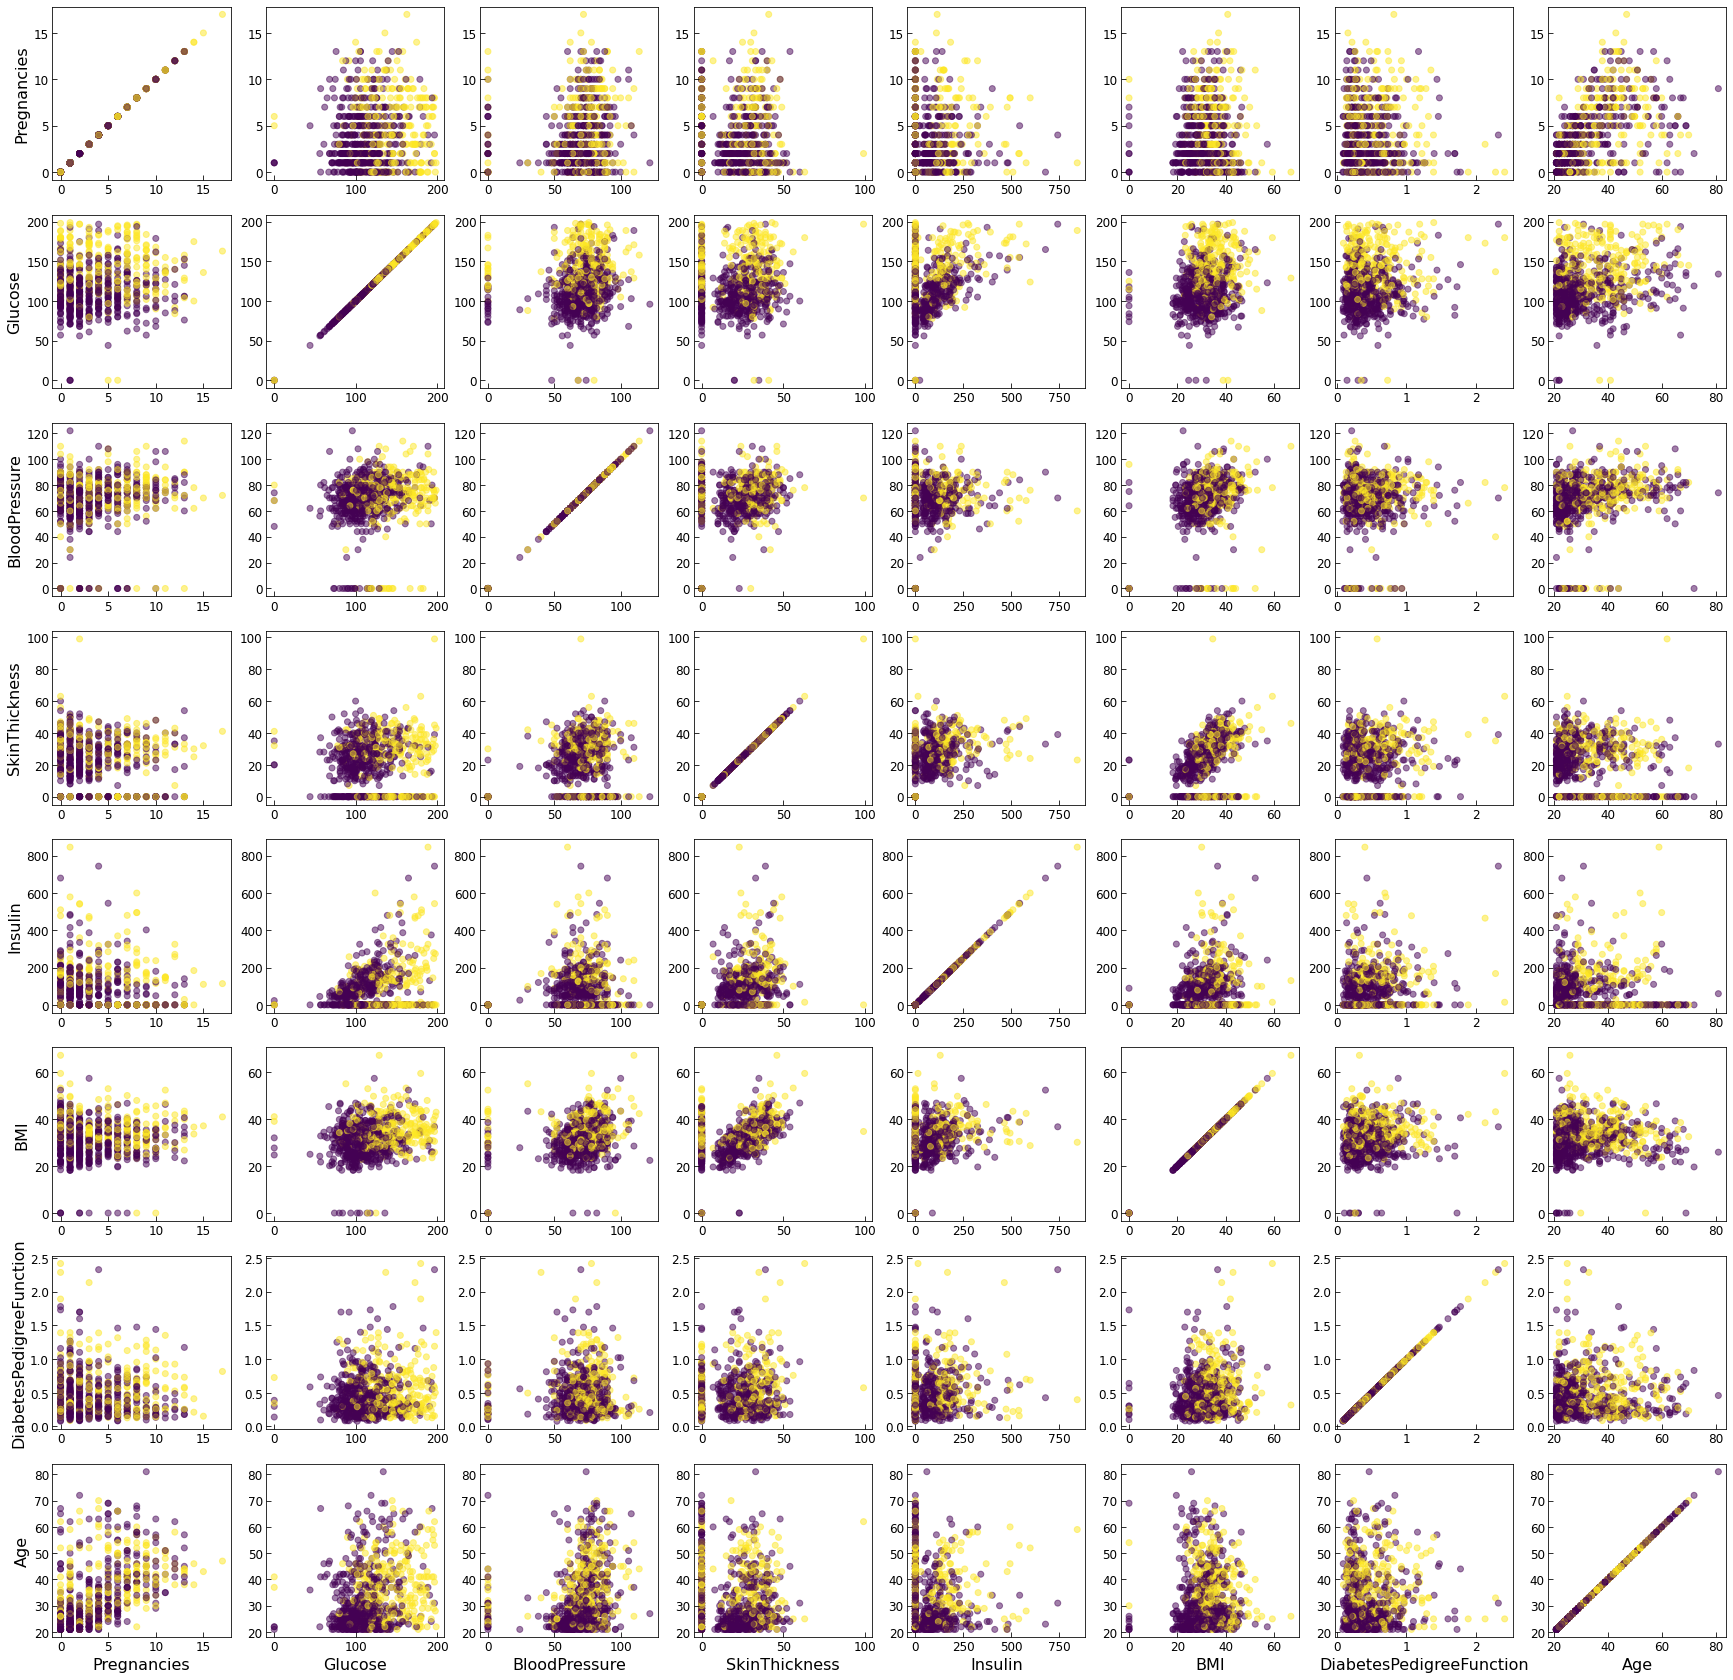

In [154]:
fig, ax = plt.subplots(nrows=8, ncols=8, figsize=(30, 30))

# 'DiabetesPedigreeFunction', 'SkinThickness', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies', 'BMI', 'Glucose'
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

scat_ax(0, 0, Pregnancies, Pregnancies, ' ', 'Pregnancies')
scat_ax(0, 1, Glucose, Pregnancies, ' ', ' ')
scat_ax(0, 2, BloodPressure, Pregnancies, ' ', ' ')
scat_ax(0, 3, SkinThickness, Pregnancies, ' ', ' ')
scat_ax(0, 4, Insulin, Pregnancies, ' ', ' ')
scat_ax(0, 5, BMI, Pregnancies, ' ', ' ')
scat_ax(0, 6, DiabetesPedigreeFunction, Pregnancies, ' ', ' ')
scat_ax(0, 7, Age, Pregnancies, ' ', ' ')

scat_ax(1, 0, Pregnancies, Glucose, ' ', 'Glucose')
scat_ax(1, 1, Glucose, Glucose, ' ', ' ')
scat_ax(1, 2, BloodPressure, Glucose, ' ', ' ')
scat_ax(1, 3, SkinThickness, Glucose, ' ', ' ')
scat_ax(1, 4, Insulin, Glucose, ' ', ' ')
scat_ax(1, 5, BMI, Glucose, ' ', ' ')
scat_ax(1, 6, DiabetesPedigreeFunction, Glucose, ' ', ' ')
scat_ax(1, 7, Age, Glucose, ' ', ' ')

scat_ax(2, 0, Pregnancies, BloodPressure, ' ', 'BloodPressure')
scat_ax(2, 1, Glucose, BloodPressure, ' ', ' ')
scat_ax(2, 2, BloodPressure, BloodPressure, ' ', ' ')
scat_ax(2, 3, SkinThickness, BloodPressure, ' ', ' ')
scat_ax(2, 4, Insulin, BloodPressure, ' ', ' ')
scat_ax(2, 5, BMI, BloodPressure, ' ', ' ')
scat_ax(2, 6, DiabetesPedigreeFunction, BloodPressure, ' ', ' ')
scat_ax(2, 7, Age, BloodPressure, ' ', ' ')

scat_ax(3, 0, Pregnancies, SkinThickness, ' ', 'SkinThickness')
scat_ax(3, 1, Glucose, SkinThickness, ' ', ' ')
scat_ax(3, 2, BloodPressure, SkinThickness, ' ', ' ')
scat_ax(3, 3, SkinThickness, SkinThickness, ' ', ' ')
scat_ax(3, 4, Insulin, SkinThickness, ' ', ' ')
scat_ax(3, 5, BMI, SkinThickness, ' ', ' ')
scat_ax(3, 6, DiabetesPedigreeFunction, SkinThickness, ' ', ' ')
scat_ax(3, 7, Age, SkinThickness, ' ', ' ')

# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
scat_ax(4, 0, Pregnancies, Insulin, ' ', 'Insulin')
scat_ax(4, 1, Glucose, Insulin, ' ', ' ')
scat_ax(4, 2, BloodPressure, Insulin, ' ', ' ')
scat_ax(4, 3, SkinThickness, Insulin, ' ', ' ')
scat_ax(4, 4, Insulin, Insulin, ' ', ' ')
scat_ax(4, 5, BMI, Insulin, ' ', ' ')
scat_ax(4, 6, DiabetesPedigreeFunction, Insulin, ' ', ' ')
scat_ax(4, 7, Age, Insulin, ' ', ' ')

scat_ax(5, 0, Pregnancies, BMI, ' ', 'BMI')
scat_ax(5, 1, Glucose, BMI, ' ', ' ')
scat_ax(5, 2, BloodPressure, BMI, ' ', ' ')
scat_ax(5, 3, SkinThickness, BMI, ' ', ' ')
scat_ax(5, 4, Insulin, BMI, ' ', ' ')
scat_ax(5, 5, BMI, BMI, ' ', ' ')
scat_ax(5, 6, DiabetesPedigreeFunction, BMI, ' ', ' ')
scat_ax(5, 7, Age, BMI, ' ', ' ')

scat_ax(6, 0, Pregnancies, DiabetesPedigreeFunction, ' ', 'DiabetesPedigreeFunction')
scat_ax(6, 1, Glucose, DiabetesPedigreeFunction, ' ', ' ')
scat_ax(6, 2, BloodPressure, DiabetesPedigreeFunction, ' ', ' ')
scat_ax(6, 3, SkinThickness, DiabetesPedigreeFunction, ' ', ' ')
scat_ax(6, 4, Insulin, DiabetesPedigreeFunction, ' ', ' ')
scat_ax(6, 5, BMI, DiabetesPedigreeFunction, ' ', ' ')
scat_ax(6, 6, DiabetesPedigreeFunction, DiabetesPedigreeFunction, ' ', ' ')
scat_ax(6, 7, Age, DiabetesPedigreeFunction, ' ', ' ')

scat_ax(7, 0, Pregnancies, Age, 'Pregnancies', 'Age')
scat_ax(7, 1, Glucose, Age, 'Glucose', ' ')
scat_ax(7, 2, BloodPressure, Age, 'BloodPressure', ' ')
scat_ax(7, 3, SkinThickness, Age, 'SkinThickness', ' ')
scat_ax(7, 4, Insulin, Age, 'Insulin', ' ')
scat_ax(7, 5, BMI, Age, 'BMI', ' ')
scat_ax(7, 6, DiabetesPedigreeFunction, Age, 'DiabetesPedigreeFunction', ' ')
scat_ax(7, 7, Age, Age, 'Age', ' ')
